In [2]:
import pandas as pd

In [3]:
cd C:\users\Ashish kaundal\csv

C:\users\Ashish kaundal\csv


In [4]:
data=pd.read_csv("cardio_train.csv")
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [5]:
list(dict.fromkeys(list(data['cholesterol'])))

[2, 1, 3]

In [6]:
import seaborn as sns

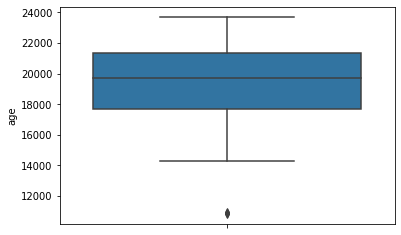

In [44]:
sns.boxplot(y=data['age'])

In [50]:
data.shape

(69301, 13)

In [62]:
aa=data.index[data['age']<=12000]

In [65]:
data=data.drop(aa)

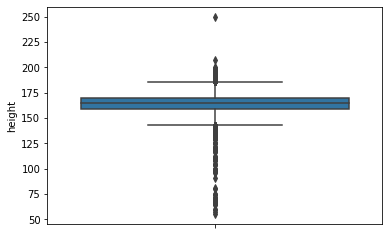

In [68]:
sns.boxplot(y=data['height'])

In [69]:
import math

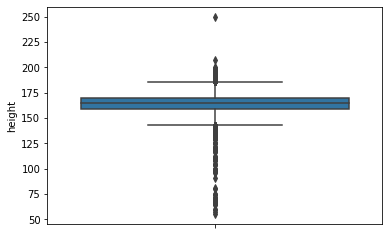

In [72]:
sns.boxplot(y=data['height'])

In [79]:
data['height']=np.log(data['height'])

In [82]:
data['weight']=np.log(data['weight'])

In [83]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,5.043425,4.234107,130,80,2,2,0,0,1,0
1,989,14648,1,5.093750,4.262680,110,70,1,1,0,0,1,1
2,990,21901,1,5.105945,4.248495,120,80,1,1,0,0,1,0
3,991,14549,2,5.105945,4.442651,120,80,1,1,1,1,1,0
4,992,23393,1,5.043425,4.127134,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,5.123964,4.330733,120,80,1,1,1,0,1,0
69297,99995,22601,1,5.062595,4.836282,140,90,2,2,0,0,1,1
69298,99996,19066,2,5.209486,4.653960,180,90,3,1,0,1,0,1
69299,99998,22431,1,5.093750,4.276666,135,80,1,2,0,0,0,1


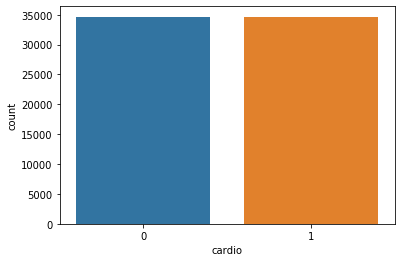

In [84]:
sns.countplot(data['cardio'])

In [85]:
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,5.043425,4.234107,130,80,2,2,0,0,1,0
1,989,14648,1,5.093750,4.262680,110,70,1,1,0,0,1,1


In [86]:
Data=data.drop('id',axis=1)

In [87]:
inp=Data[['age','height','weight','ap_hi','ap_lo','cardio']]
inp

,age,height,weight,ap_hi,ap_lo,cardio
0,22469,5.043425,4.234107,130,80,0
1,14648,5.093750,4.262680,110,70,1
2,21901,5.105945,4.248495,120,80,0
3,14549,5.105945,4.442651,120,80,0
4,23393,5.043425,4.127134,120,80,0
...,...,...,...,...,...,...
69296,19240,5.123964,4.330733,120,80,0
69297,22601,5.062595,4.836282,140,90,1
69298,19066,5.209486,4.653960,180,90,1
69299,22431,5.093750,4.276666,135,80,1


In [88]:
inputs=inp.melt(id_vars="cardio",var_name="features",value_name="value")

In [89]:
inputs

,cardio,features,value
0,0,age,22469.0
1,1,age,14648.0
2,0,age,21901.0
3,0,age,14549.0
4,0,age,23393.0
...,...,...,...
346480,0,ap_lo,80.0
346481,1,ap_lo,90.0
346482,1,ap_lo,90.0
346483,1,ap_lo,80.0


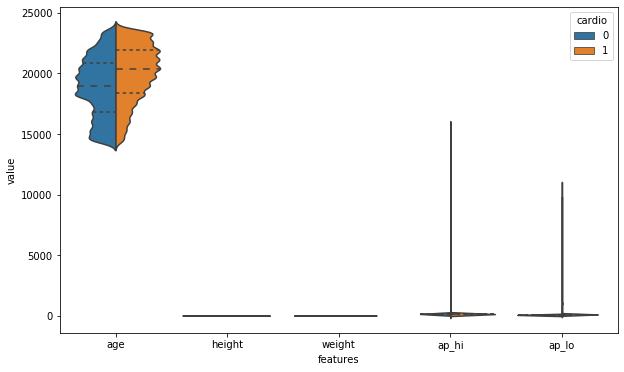

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.violinplot(x="features",y="value",data=inputs,hue="cardio",split=True,inner="quart")

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
Data[['height','weight','ap_hi','ap_lo']]=MinMaxScaler().fit_transform(Data[['height','weight','ap_hi','ap_lo']])

In [93]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [94]:
model=RandomForestClassifier()

In [95]:
x=Data.drop('cardio',axis=1)
y=Data.cardio

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [98]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [99]:
model.score(xtest,ytest)

0.7158008658008658

In [100]:
model2=GradientBoostingClassifier().fit(xtrain,ytrain)

In [101]:
model2.score(xtest,ytest)

0.738023088023088

In [102]:
model3=AdaBoostClassifier().fit(xtrain,ytrain)

In [103]:
model3.score(xtest,ytest)

0.7329004329004329

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
modell=LogisticRegression().fit(xtrain,ytrain)

In [111]:
modell.score(xtest,ytest)

0.49444444444444446

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
modeld=DecisionTreeClassifier().fit(xtrain,ytrain)

In [114]:
modeld.score(xtest,ytest)

0.633982683982684

# feature selection using violin plot

In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
modeld=MLPClassifier().fit(xtrain,ytrain)
modeld.score(xtest,ytest)

0.49444444444444446

In [106]:
import xgboost

In [107]:
modele=xgboost.XGBClassifier().fit(xtrain,ytrain)

In [108]:
modele.score(xtest,ytest)

0.7364357864357864

In [115]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [116]:
clf1=GridSearchCV(GradientBoostingClassifier(),
                 {"learning_rate":[.1,.15,.2,.5,1,2],
                 "n_estimators":[100,150,300]},return_train_score=False)

In [117]:
clf1.fit(x,y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.5, 1, 2],
                         'n_estimators': [100, 150, 300]})

In [118]:
clf1.best_score_

0.7361934498625458

In [119]:
clf1.best_params_

{'learning_rate': 0.15, 'n_estimators': 300}

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
abc=cross_val_score(GradientBoostingClassifier(learning_rate=.1,n_estimators=300),x,y,cv=5)

In [39]:
import numpy as np

In [41]:
np.mean(abc)

0.7362953850292426

In [128]:
Data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,0.684283,0.644758,0.017316,0.013550,2,2,0,0,1,0
1,14648,1,0.717520,0.654296,0.016079,0.012647,1,1,0,0,1,1
2,21901,1,0.725574,0.649561,0.016698,0.013550,1,1,0,0,1,0
3,14549,2,0.725574,0.714372,0.016698,0.013550,1,1,1,1,1,0
4,23393,1,0.684283,0.609050,0.016698,0.013550,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,0.737475,0.677013,0.016698,0.013550,1,1,1,0,1,0
69297,22601,1,0.696944,0.845769,0.017934,0.014453,2,2,0,0,1,1
69298,19066,2,0.793957,0.784908,0.020408,0.014453,3,1,0,1,0,1
69299,22431,1,0.717520,0.658964,0.017625,0.013550,1,2,0,0,0,1


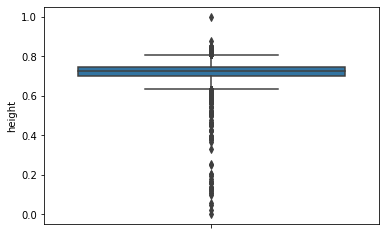

In [131]:
sns.boxplot(y=Data['height'])

In [135]:
Data=Data.drop(Data.index[Data['height']<=.6])

In [136]:
Data=Data.drop(Data.index[Data['height']>=.8])

In [137]:
Data.shape

(68574, 12)

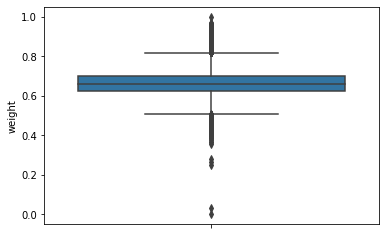

In [139]:
sns.boxplot(y=Data['weight'])

In [140]:
Data=Data.drop(Data.index[Data['weight']<=.5])

In [141]:
Data=Data.drop(Data.index[Data['weight']>=.8])

In [142]:
Data.shape

(66872, 12)

In [145]:
xx=Data.drop("cardio",axis=1)
yy=Data.cardio

In [146]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=.2)

In [152]:
modelx=xgboost.XGBClassifier().fit(x_train,y_train)

In [153]:
modelx.score(x_test,y_test)

0.7330093457943925